## Create a function of denoise test

In [75]:
import numpy as np
from scipy.fftpack import dctn,idctn
from PIL import Image
import math
import matplotlib.pyplot as plt
import io


In [77]:
def compute_dct_patch(patch):
    patch_normalized = 2*(patch-0.5)
    dct_coefficients = dctn(patch_normalized, norm='ortho')
    return dct_coefficients

def compute_idct(dct_coefficients):
    patch = idctn(dct_coefficients, norm='ortho')/2+0.5
    return patch

In [136]:
def functionDCT(img, sigma):
    patch = np.array(img)/255
    d = patch.shape
    x,y = d
    n_p = x
    mean = 0
    n = np.random.normal(mean,sigma, d)
    noise_img = patch + n
    print('PSNR of noisy img = ', 10*np.log10(n_p**2/np.linalg.norm(noise_img-patch)**2))
    
    index_vec = np.array([15,14,13,12,11,10,9,8,7,6,5,4,3,2,1])
    psnr_all = []
    for i in index_vec:
        T = sigma*i
        dct_result = compute_dct_patch(noise_img)
        dct_result_quantized = dct_result
        dct_result_quantized[np.where(np.abs(dct_result)<T)] = 0
        patch_hat = compute_idct(dct_result_quantized)
        psnr =  10*np.log10(n_p**2/np.linalg.norm(patch-patch_hat)**2)
        print('PSNR = ',psnr)
        psnr_all.append(psnr)
    ##
    plt.plot(index_vec,psnr_all)
    max_psnr = max(psnr_all)
    print('MAX PSNR = ', max_psnr)
    print('max index = ', psnr_all.index(max_psnr))
##
    

In [138]:
clean_img = Image.open('foreman.tif')

PSNR of noisy img =  19.99527256173528
PSNR =  25.392523771275965
PSNR =  25.578741851323954
PSNR =  25.81275582404764
PSNR =  26.06517663658348
PSNR =  26.35983723022235
PSNR =  26.60523975876615
PSNR =  26.98249434274463
PSNR =  27.394051563913635
PSNR =  27.57270950986472
PSNR =  27.334566898227813
PSNR =  26.09330890680505
PSNR =  24.221421301104137
PSNR =  22.221522175541928
PSNR =  20.771087707376093
PSNR =  20.106847606479832
MAX PSNR =  27.57270950986472
max index =  8


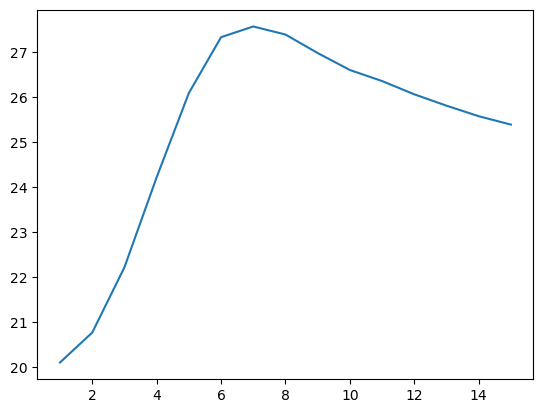

In [140]:
functionDCT(clean_img,0.1)